In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

- <b>Supervised learning:</b> The machine learning program is both given the input data and the corresponding labelling. This means that the learn data has to be labelled by a human being beforehand.
- <b>Unsupervised learning:</b> No labels are provided to the learning algorithm. The algorithm has to figure out the a clustering of the input data.
- <b>Reinforcement learning:</b> A computer program dynamically interacts with its environment. This means that the program receives positive and/or negative feedback to improve it performance.

Scikit-learn makes available a host of datasets for testing learning algorithms. They come in three flavors:

- <b>Packaged Data:</b> these small datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in sklearn.datasets.load_*
- <b>Downloadable Data:</b> these larger datasets are available for download, and scikit-learn includes tools which streamline this process. These tools can be found in sklearn.datasets.fetch_*
- <b>Generated Data:</b> there are several datasets which are generated from models based on a random seed. These are available in the sklearn.datasets.make_*

<b><big>1) Representation and Data Visualization

In [2]:
# the iris classification dataset, a clasic problem in machine learning
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# m:4 features and n:140 instances/samples
print(iris.feature_names)
iris.data.shape

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

In [5]:
# labels/classes of each instance:
print(iris.target_names)
np.bincount(iris.target)

['setosa' 'versicolor' 'virginica']


array([50, 50, 50], dtype=int64)

C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


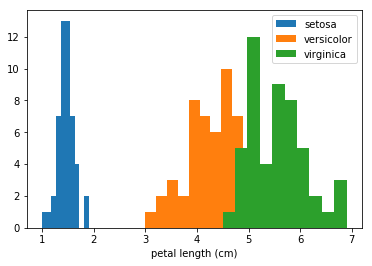

In [6]:
# visualizing 1 feature
fig, ax = plt.subplots()

# 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
feature_num = 2  
colors = ['blue', 'red', 'green']

for i in range(len(iris.target_names)):
    ax.hist(iris.data[iris.target==i, feature_num], label=iris.target_names[i])

ax.set_xlabel(iris.feature_names[feature_num])
ax.legend(loc='upper right')
fig.show()

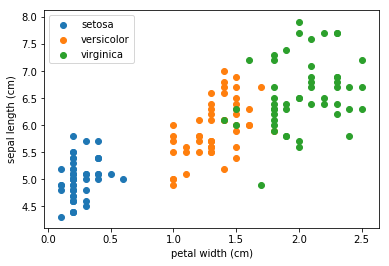

In [7]:
# scatter plot with 2 features:
fig, ax = plt.subplots()

feature1 = 3
feature2 = 0

for i in range(len(iris.target_names)):
    ax.scatter(iris.data[:,feature1][iris.target==i],
               iris.data[:,feature2][iris.target==i],
               label=iris.target_names[i])
# or
#for i in range(len(iris.target_names)):
    #ax.scatter(iris.data[iris.target==i,feature1],
               #iris.data[iris.target==i,feature2],
               #label=iris.target_names[i])
    
ax.set_xlabel(iris.feature_names[feature1])
ax.set_ylabel(iris.feature_names[feature2])

ax.legend(loc='best')

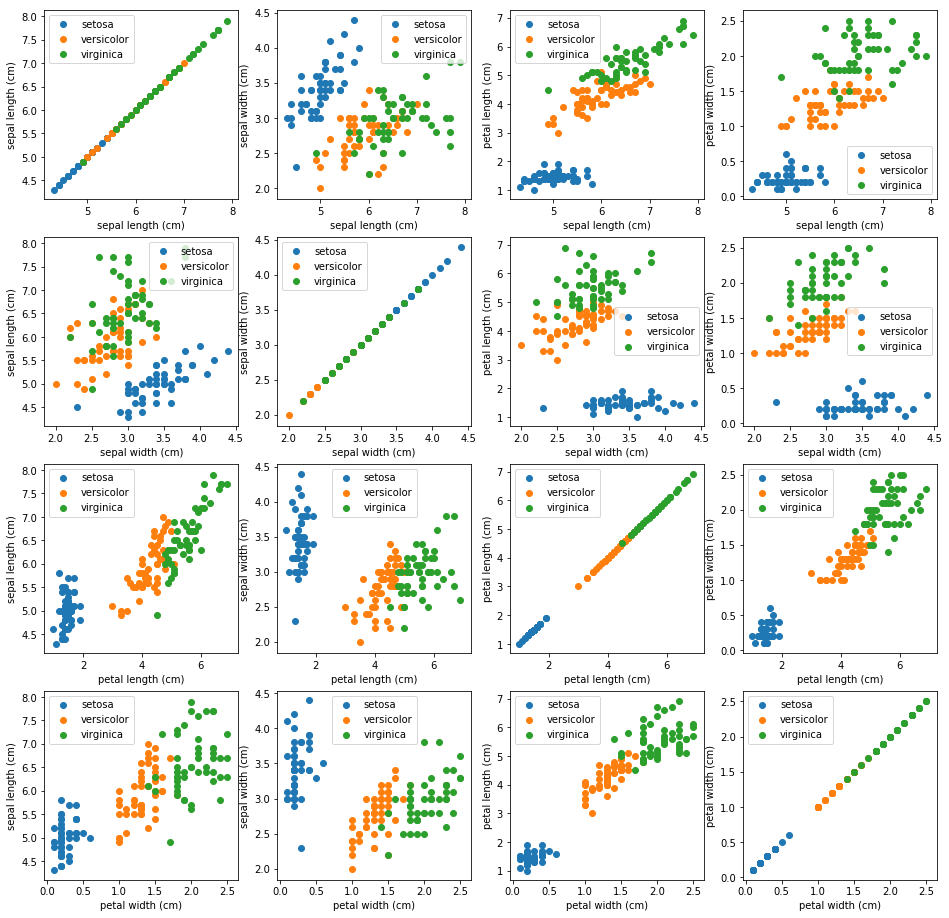

In [8]:
n = iris.data.shape[1]

fig, ax = plt.subplots(n,n,figsize=(16,16))

for i in range(n):
    for j in range(n):
        for k in range(len(iris.target_names)):
            ax[i,j].scatter(iris.data[:,i][iris.target==k],
                           iris.data[:,j][iris.target==k],
                           label=iris.target_names[k])
        ax[i,j].set_xlabel(iris.feature_names[i])
        ax[i,j].set_ylabel(iris.feature_names[j])
        ax[i,j].legend(loc='best')  

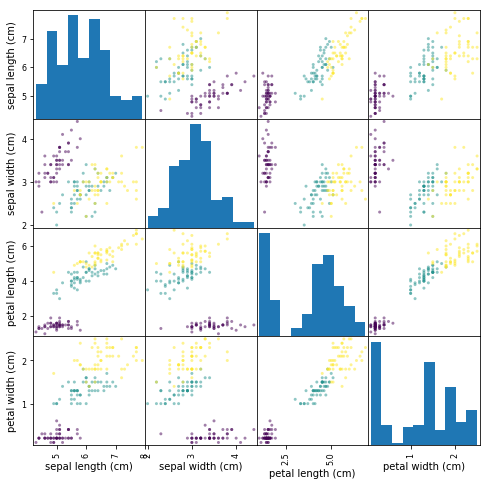

In [9]:
# Instead of doing it manuall we can use the scatterplot matrix of pandas
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df,c=iris.target,figsize=(8,8))
plt.show()

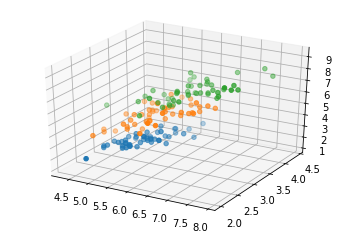

In [10]:
# 3D visualization
X = []
for j in range(3):
    X.append([[],[],[]])
    for i in range(len(iris.data)):
        if iris.target[i] == j:
            X[j][0].append(iris.data[i][0])
            X[j][1].append(iris.data[i][1])
            # Reduce the data to three values by summing up the third and fourth value, 
            # so that we are capable of depicting the data in 3-D
            X[j][2].append(sum(iris.data[i][2:]))
            
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for j in range(3):
    ax.scatter(X[j][0],X[j][1],X[j][2])
    
plt.show()

<b><big>2) Data Preparation

In [11]:
# Splitting the dataset manually
# careful if the dataset's target values are sorted, we have to shuffle it
# rearrange the data according to new indices:
indices = np.random.permutation(len(iris.data))

n_test = 50  # specify the number of test samples

X_train = iris.data[indices[:-n_test]]
y_train = iris.target[indices[:-n_test]]

X_test = iris.data[indices[-n_test:]]
y_test = iris.target[indices[-n_test:]]

In [12]:
from sklearn.model_selection import train_test_split
# splitting with sklearn

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,train_size=0.8)

C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
# stratified random sample
# Stratification means that we keep the original class proportion of the data set in the test and training sets
print('All data    : ', np.bincount(iris.target))
print('Training set: ', np.bincount(y_train))
print('Test set    : ', np.bincount(y_test))

All data    :  [50 50 50]
Training set:  [41 43 36]
Test set    :  [ 9  7 14]


In [14]:
# To stratify the division, we can pass the label array as an additional argument to the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    train_size=0.8,
                                                   stratify=iris.target)

print('All data    : ', np.bincount(iris.target))
print('Training set: ', np.bincount(y_train))
print('Test set    : ', np.bincount(y_test))

All data    :  [50 50 50]
Training set:  [40 40 40]
Test set    :  [10 10 10]


<b><big>4) K-Nearest Neighbor Classifier</b></big>
    
"show me who your friends are and I'll tell you who you are"

In [73]:
# We create the KNN algorithm using python
# we create a function for the euclidean distance
def distance(instance1,instance2):
    # just in case the instances are lists or tuples:
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    # return the euclidean norm of the difference between the 2 instances/vectors
    return np.linalg.norm(instance1-instance2)


# we create a function that returns a list of 'k' neighbors:
def get_neighbors(X_train,y_train,test_instance,k):
    """
    returns k nearest neighbors in the form of tuples (index,dist,class)
    """
    distances = []
    for i in range(len(X_train)):
        dist = distance(test_instance,X_train[i])
        distances.append((i,dist,y_train[i]))
        # sort according to the distance 
        # apprently this is the classic way to sort a list of tuples according to a certain component
    distances.sort(key=lambda x:x[1])
    neighbors = distances[:k]
    return neighbors


# Voting to get a single result
from collections import Counter

def vote(neighbors):
    counter = Counter()
    for neighbor in neighbors:
        counter[neighbor[2]] += 1
    return counter.most_common(1)[0][0]


# measure the accuracy of the algorithm:
def measure_accuracy(y_pred,y_test):
    a = (y_pred == y_test)
    return np.sum(a)/len(y_pred)*100

In [76]:
# IMPLEMENTATION
# Predict results from the algorithm
y_pred = np.zeros(y_test.shape)

for i in range(len(X_test)):
    neighbors = get_neighbors(X_train,y_train,X_test[i],5)
    y_pred[i] = vote(neighbors)

# Show the accuracy of the algorithm
accuracy = measure_accuracy(y_pred,y_test)
print('Accuracy: {:.2f}%'.format(accuracy))

# Show y_pred and y_test:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

Accuracy: 96.67%
[[1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 2.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [2. 2.]]


[[1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 2.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [2. 2.]]


<b>Generating Artificial Datasets

In [57]:
# Sometimes datasets are expensive or protected by copyright so the only option to train our machine learning models is 
# to create artificial datasets

# Example1: Generating fake temperature datasets
prefectures = ['Hokkaido','Aomori','Akita','Sendai','Yamagata','Nagano','Niigata']
temperatures = np.random.normal(9,2,len(prefectures))
df = pd.DataFrame(data=temperatures,index=prefectures,columns=['Temperature'])
df

,Temperature
Hokkaido,9.806707
Aomori,7.578341
Akita,5.746559
Sendai,7.580245
Yamagata,11.434405
Nagano,8.612349
Niigata,6.988736


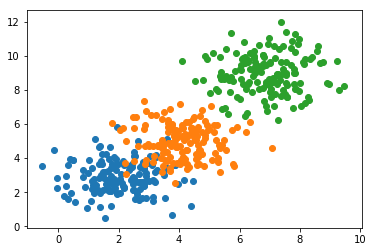

In [77]:
# Generate sytnthetic data with Scikit-learn
# make blob like data (points gathered around centers)
from sklearn.datasets import make_blobs

centers = np.array([[2,3],[4,5],[7,9]])

features, target = make_blobs(n_samples=450,centers=centers)

for i in range(3):
    plt.scatter(features[target==i,0],features[target==i,1])

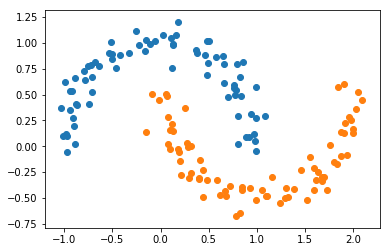

In [78]:
# Generate moons data
from sklearn.datasets import make_moons

features, target = make_moons(n_samples=150,
                             shuffle=True,
                             noise=0.1)

plt.scatter(features[target==0,0],features[target==0,1])
plt.scatter(features[target==1,0],features[target==1,1])

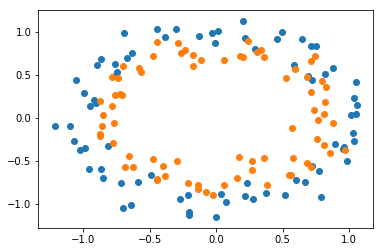

In [80]:
from sklearn.datasets import make_circles

features, target = make_circles(n_samples=150,
                                shuffle=True,
                                noise=0.1)

plt.scatter(features[target==0,0],features[target==0,1])
plt.scatter(features[target==1,0],features[target==1,1])